# **PLAY STORE APP REVIEW ANALYSIS**



##### EDA (Exploratory Data Analysis)
##### Individual


# **Project Summary**

Play Store is a Library of android applications where we find multiple application of same genre, which application to choose and which one not is a good question that arises.

This Project is to analyse the playstore review dataset and find insights also make use of charts to visualize them.


# **GitHub Link -**

https://github.com/ShrinarayanP/Playstore-Review-Analysis.IPYNB

# **Problem Statement**


**This project will answer some of the questions like :

Is the application being updated by the creator regularly.

Which android version is now outdated for applications.

which Genre is the most downloaded.

Which is the highest number of downloaded app in the dataset etc.**

#### **Define Your Business Objective?**

My business aims to track what the given data study results or the conclusions.
Because these conclusions are the data which I will sell to the required companies so that they can make handsome profits.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/AIma Better/Play Store Data.csv')

### Dataset First View

In [5]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [6]:
print(f"Number of rows = {dataset.shape[0]}")
print(f"Number of columns = {dataset.shape[1]}")

Number of rows = 10841
Number of columns = 13


### Dataset Information

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [8]:
dataset.duplicated().sum()

483

In [9]:
data = dataset.drop_duplicates(keep= 'first')

In [10]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(10358, 13)

In [13]:
print(f"Number of Rows Deleted = {dataset.shape[0]-data.shape[0]}")

Number of Rows Deleted = 483


#### Missing Values/Null Values

In [14]:
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

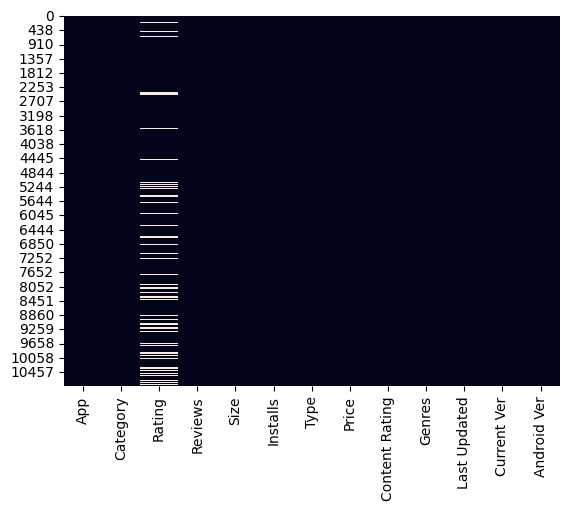

In [15]:
sns.heatmap(data.isnull(), cbar = False)

In [16]:
# Handling the missing values 
# input 1, for no ratings.
# drop the rows with missing Android Ver, Content Rating, Type, Current Ver as its observations are very very less.
data['Rating'].fillna(value = 1, inplace = True)
data.dropna(axis = 0, inplace = True)
print(data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


<ipython-input-16-bc4f5a583492>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rating'].fillna(value = 1, inplace = True)
<ipython-input-16-bc4f5a583492>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis = 0, inplace = True)


In [17]:
data.shape

(10346, 13)

In [18]:
data[data['Rating']==1].shape

(1476, 13)

<Axes: >

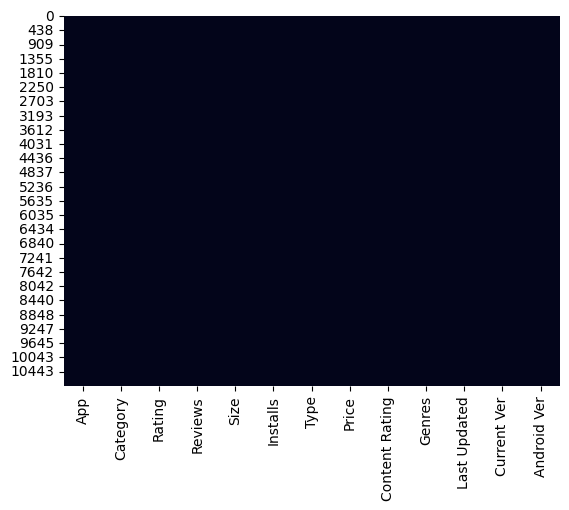

In [19]:
sns.heatmap(data.isnull(), cbar = False)

### What did you know about your dataset?

From the dataset we found following:
1.   dataset had 483 duplicate values, removed duplicates.
2.   dataset had null values in ratings - replaced with 1 because for now these apps are either new or they are not important to users or has to be studied separately.
3.   dataset had null values in Android Ver, Content Rating, Type, Current Ver - removed rows with null because the number of rows where too less.



## ***2. Understanding Your Variables***

In [20]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [21]:
data.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10346,10346,10346.000000,10346,10346,10346,10346,10346,10346,10346,10346,10346,10346
unique,9648,33,NaN,5999,457,20,2,92,6,119,1376,2831,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1939,NaN,591,1525,1487,9584,9584,8372,840,298,1301,2379
mean,NaN,NaN,3.738082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.210921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

**App** - Name of the application

**Category** - The category of the app

**Rating** - Rating given by users

**Reviews** - Users Opinion After using the app

**Size** - Size(storage space) of the application

**Installs** - Number of installations or downloads

**Type** - If the App Free or Paid

**Price** - If Paid then what is the price

**Content Rating** - Whether the application can be used by or not for a specific group of age

**Genre** - Genre of the App

**Last Updated** - When was the application last updated

**Current Ver** - The Current Version of the Application

**Android Ver** - The Android Version on which the Application will work and is suitable for 

### Check Unique Values for each variable.

In [22]:
for col in data.columns:
  print(col, '-', data[col].nunique(), 'Unique Values')

App - 9648 Unique Values
Category - 33 Unique Values
Rating - 39 Unique Values
Reviews - 5999 Unique Values
Size - 457 Unique Values
Installs - 20 Unique Values
Type - 2 Unique Values
Price - 92 Unique Values
Content Rating - 6 Unique Values
Genres - 119 Unique Values
Last Updated - 1376 Unique Values
Current Ver - 2831 Unique Values
Android Ver - 33 Unique Values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
data['Last Updated'] = data['Last Updated'].apply(pd.to_datetime)

<ipython-input-24-5da83970c8f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Last Updated'] = data['Last Updated'].apply(pd.to_datetime)


In [25]:
data['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

In [26]:
data['Last Updated'].min()

Timestamp('2010-05-21 00:00:00')

In [27]:
data['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [28]:
data['Category'].value_counts().head()
# From This Data we conclude that The Family Category apps are highest.

FAMILY      1939
GAME        1121
TOOLS        841
BUSINESS     427
MEDICAL      408
Name: Category, dtype: int64

In [30]:
data[data['Category'] == 'GAME']['Genres'].value_counts()

Action                           356
Arcade                           218
Racing                            98
Adventure                         75
Card                              48
Board                             44
Casual                            43
Casino                            39
Puzzle                            38
Trivia                            38
Word                              28
Strategy                          22
Music                             21
Role Playing                      16
Sports                            13
Simulation                        10
Adventure;Action & Adventure       5
Action;Action & Adventure          3
Casual;Action & Adventure          1
Casual;Pretend Play                1
Simulation;Education               1
Casual;Brain Games                 1
Simulation;Action & Adventure      1
Casual;Creativity                  1
Name: Genres, dtype: int64

In [62]:
# from this data we find that applications are mostly made on tools genre.
data['Genres'].value_counts().head()

Tools            840
Entertainment    587
Education        526
Business         427
Medical          408
Name: Genres, dtype: int64

In [63]:
data['Rating'].value_counts()

1.0    1476
4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
2.2      14
1.9      12
2.0      12
2.1       8
1.7       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [64]:
data[data['Rating'] == 5.0]['Installs'].value_counts()

100+       112
10+         48
1,000+      37
50+         32
500+        27
5+           8
1+           3
5,000+       3
10,000+      1
Name: Installs, dtype: int64

In [65]:
data[data['Rating'] == 5.0]['Reviews'].value_counts()

1      45
2      42
3      37
4      27
5      25
7      13
6      12
8      11
10      6
15      4
22      4
12      4
14      3
19      3
13      3
43      3
9       3
36      2
20      2
18      2
25      1
16      1
33      1
141     1
104     1
90      1
34      1
103     1
17      1
47      1
24      1
11      1
23      1
100     1
21      1
26      1
30      1
44      1
41      1
32      1
Name: Reviews, dtype: int64

In [66]:
# From the number of installs and number of reviews it is conclusive that 5 rating apps may have bogus reviews and fake installs 
# or it may also be new applications

In [67]:
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+',''))
data['Installs'] = data['Installs'].apply(lambda x: x.split(','))
data['Installs'] = data['Installs'].apply(lambda x: ''.join(x))
data['Installs'] = data['Installs'].apply(pd.to_numeric)
data['Installs']

<ipython-input-67-2303191ac5bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].apply(lambda x: x.replace('+',''))
<ipython-input-67-2303191ac5bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].apply(lambda x: x.split(','))
<ipython-input-67-2303191ac5bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10346, dtype: int64

In [68]:
data[data['Installs'] == data['Installs'].max()]['Category'].value_counts()

COMMUNICATION          14
SOCIAL                  7
GAME                    5
TRAVEL_AND_LOCAL        5
PHOTOGRAPHY             4
PRODUCTIVITY            3
VIDEO_PLAYERS           3
NEWS_AND_MAGAZINES      3
TOOLS                   2
BOOKS_AND_REFERENCE     1
ENTERTAINMENT           1
FAMILY                  1
Name: Category, dtype: int64

In [69]:
# to know the genre of applications having highest number of installs
data[data['Installs'] == data['Installs'].max()]['Genres'].value_counts()

Communication              14
Social                      7
Arcade                      5
Travel & Local              5
Photography                 4
Productivity                3
Video Players & Editors     3
News & Magazines            3
Entertainment               2
Tools                       2
Books & Reference           1
Name: Genres, dtype: int64

In [70]:
data['Reviews'] = data['Reviews'].apply(lambda x: eval(x))

<ipython-input-70-1978356cee43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reviews'] = data['Reviews'].apply(lambda x: eval(x))


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int64         
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  object        
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [72]:
# I am setting a limit on Reviews of 1000 as minimum because the more reviews the better it is to understand the app
# Setting a limit on Rating of 4 so that we are considering only great performing applications
df1 = data[(data['Reviews'] > 1000) & (data['Rating'] > 4.0)]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000,Free,0,Everyone,Art & Design,2017-10-27,1.0.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,1000000,Free,0,Teen,Action,2018-08-07,1.5.447,4.0 and up
10804,Poker Pro.Fr,GAME,4.2,5442,17M,100000,Free,0,Teen,Card,2018-05-22,4.1.3,2.3 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24M,1000000,Free,0,Everyone,Strategy,2018-07-18,1.4.2,4.1 and up
10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.9M,500000,Free,0,Everyone,Books & Reference,2018-07-19,7.0.4.6,4.2 and up


In [73]:
df1['Rating'].value_counts()

4.4    784
4.3    762
4.5    730
4.2    660
4.6    557
4.1    439
4.7    308
4.8    105
4.9     25
Name: Rating, dtype: int64

In [74]:
df1['Installs'].value_counts()

1000000       1102
10000000       961
5000000        541
100000         540
100000000      360
500000         341
50000000       252
50000          111
10000           65
500000000       57
1000000000      38
5000             2
Name: Installs, dtype: int64

In [75]:
df1[df1['Rating'] == 4.9]
# looking at highest rated apps are health and fitness, Auto and Vehicles, Books and Reference, Education, Games etc
# but mostly highest ratings are given to applications which are helpful or services based in day today life or for entertainment and sports or health

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,100000,Free,0,Everyone,Auto & Vehicles,2018-07-18,1.7.1,4.0 and up
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,100000,Free,0,Everyone,Auto & Vehicles,2018-07-03,1.7,4.2 and up
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,100000,Free,0,Everyone,Auto & Vehicles,2018-07-03,1.7,4.2 and up
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0,Everyone,Auto & Vehicles,2018-07-15,8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0,Everyone,Beauty,2017-11-09,2.3.0,4.1 and up
177,eBoox new: Reader for fb2 epub zip books,BOOKS_AND_REFERENCE,4.9,2739,21M,50000,Free,0,Everyone,Books & Reference,2018-07-17,2.0,3.0 and up
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0,Everyone,Education;Education,2018-07-20,2.16.11.10,4.2 and up
1258,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,5000000,Free,0,Everyone,Health & Fitness,2018-06-21,1.0.4,4.2 and up
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0,Everyone,Health & Fitness,2018-06-21,1.0.2,4.2 and up
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10M,1000000,Free,0,Everyone,Health & Fitness,2018-07-30,Varies with device,Varies with device


In [76]:
# High Installs are mostly games.
df1[(df1['Installs'] == data['Installs'].max()) & (df1['Rating'] > 4.4)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76M,1000000000,Free,0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,1000000000,Free,0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,2018-07-31,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0,Teen,Social,2018-07-31,Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1000000000,Free,0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
3896,Subway Surfers,GAME,4.5,27711703,76M,1000000000,Free,0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up


In [44]:
# The above data is evident that users are more and more interested in games, photography and Social medias.

In [77]:
data['Android Ver'].value_counts()

4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1335
Varies with device    1220
4.4 and up             894
2.3 and up             642
5.0 and up             546
4.2 and up             386
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             235
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [78]:
# Consideing applications which works only on android version 4.0 and above so that we can balance technology and users
df2 = df1[(df1['Android Ver'] == '4.1 and up') | (df1['Android Ver'] == '4.0.3 and up') | (df1['Android Ver'] == '4.0 and up') |\
          (df1['Android Ver'] == '4.4 and up') | (df1['Android Ver'] == '5.0 and up') | (df1['Android Ver'] == '4.2 and up') |\
          (df1['Android Ver'] == '4.3 and up') | (df1['Android Ver'] == '4.4W and up') | (df1['Android Ver'] == '7.1 and up') |\
          (df1['Android Ver'] == '4.0.3 - 7.1.1') | (df1['Android Ver'] == '5.0 - 8.0') | (df1['Android Ver'] == '7.0 - 7.1.1') |\
          (df1['Android Ver'] == '4.1 - 7.1.1') | (df1['Android Ver'] == '5.0 - 6.0') | (df1['Android Ver'] == '5.0 - 7.1.1')]

In [79]:
# Ques - Why Android version 4 and above ?
# Ans - Because 66.7 % applications are working on these versions of the total considerably good aaps
# good apps means the basic criteria of having atleast 1000 reviews and 4.0 Rating

df2.count()[0]/df1.count()[0]* 100

66.70480549199085

In [80]:
# Checking for the Categories count to know what categories of apps are in demand
df2['Category'].value_counts().head()

GAME           553
FAMILY         537
TOOLS          173
PHOTOGRAPHY    130
SPORTS         110
Name: Category, dtype: int64

In [81]:
# looking at which Genres are under Family Category
df2[df2['Category'] == 'FAMILY']['Genres'].value_counts()

Entertainment                         75
Simulation                            61
Role Playing                          45
Strategy                              37
Education                             34
Casual                                34
Puzzle                                33
Casual;Pretend Play                   19
Educational;Education                 15
Puzzle;Brain Games                    13
Racing;Action & Adventure             12
Entertainment;Music & Video           12
Educational;Pretend Play              12
Casual;Action & Adventure             10
Education;Education                    9
Casual;Brain Games                     9
Arcade;Action & Adventure              8
Adventure;Action & Adventure           8
Simulation;Action & Adventure          6
Action;Action & Adventure              6
Casual;Creativity                      5
Educational;Brain Games                5
Educational                            5
Puzzle;Action & Adventure              5
Role Playing;Act

In [82]:
# Checking which Genres of the Category is liked by users.
df2['Genres'].value_counts().head()

Tools            173
Action           166
Photography      130
Sports           123
Entertainment    113
Name: Genres, dtype: int64

### What all manipulations have you done and insights you found?

**From Above Analysis we found that :**

50% of data had either very less review to conclude anything or very less ratings to include in the dataset.

all 5 rating apps are either new or not capable to fulfill needs of users.

Most downloads in my filtered out data is either under games or family of which action genre is most liked under games category and Entertainment Under Family Category, Which concludes mobile applications are used for fun, family time and also health and fitness.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

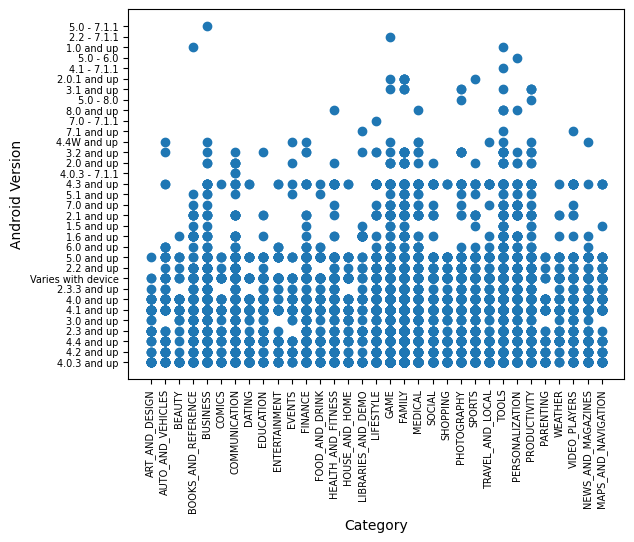

In [89]:
x = data['Category']
y = data['Android Ver']
plt.xticks(rotation = 90, size = 7)
plt.yticks(size = 7)
plt.xlabel('Category')
plt.ylabel('Android Version')
plt.scatter(x,y)

##### 1. Why did you pick the specific chart?

**I plot this chart to check which category applications works on maximum number of android versions**

##### 2. What is/are the insight(s) found from the chart?

**from this we find that almost all categories applications can work on Android version 4 and above**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This Data helps us understand that 4 and above is the most suitable android 
Version for any application**
**This data helps us understand that if we build any application it must be suitable with android version 4 and above**

#### Chart - 2

<BarContainer object of 33 artists>

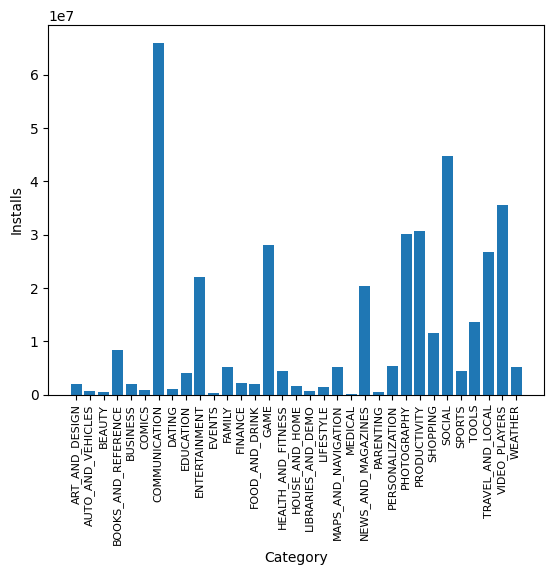

In [100]:
y1 = data.groupby('Category')['Installs'].agg('mean')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.xticks(rotation = 90, size = 8)
plt.bar(y1.index,y1[0:])

##### 1. Why did you pick the specific chart?

**To Visualize Which Category of apps has highest number of Installs**

##### 2. What is/are the insight(s) found from the chart?

**COMMUNICATION, SOCIAL, GAME, ENTERTAINMENT, PHOTOGRAPHY, TRAVEL AND LOCAL,PRODUCTIVITY, VIDEO PLAYER, NEWS AND MAGAZINES.

The Above Categories has highest downloads.**

##### 3. Will the gained insights help creating a positive business impact? 

**The Above Informations are Useful as it helps us determine what users are looking for online and with that the product in market can also be supplied, thus helping the businesses to set target.**

#### Chart - 3

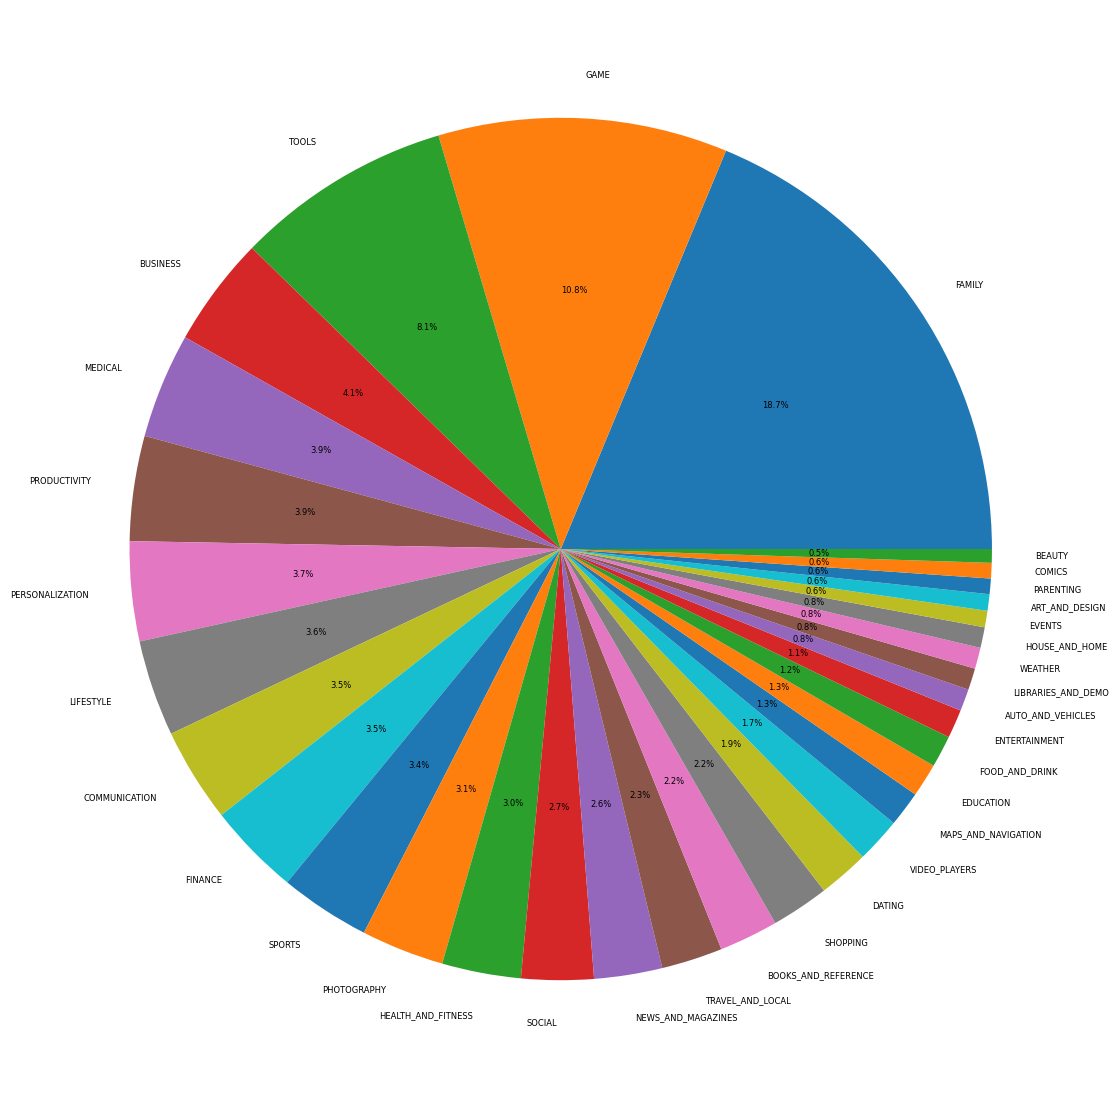

In [107]:
x2 = data['Category'].value_counts()
labels = data['Category'].value_counts().index
plt.figure(figsize = (14,14))
plt.pie(x2,labels = labels, autopct = '%1.1f%%',textprops={'fontsize': 6})
plt.show()

##### 1. Why did you pick the specific chart?

**To know the percent wise categorisation of each category in the given dataset**

##### 2. What is/are the insight(s) found from the chart?

**From chart we find that, in the given dataset;
1. 18.70% of the total are applications on family.
2. 10.80% of the total are applications on games.
3. 8.10% of the total are applications on tools.

Thus this 3 covers 37.6% of total applications on playstore, which explains that users need entertainment stuffs, likes to play online games of different types, uses phones to get online services**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**No insights for negative growth, rather this helps us know the needs of users**.

#### Chart - 4

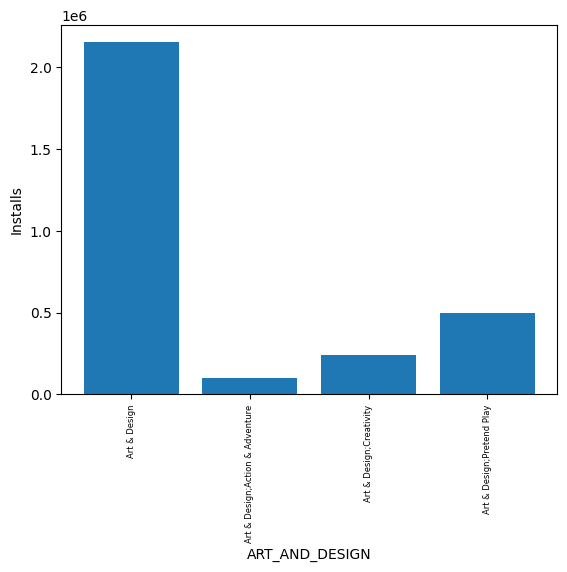

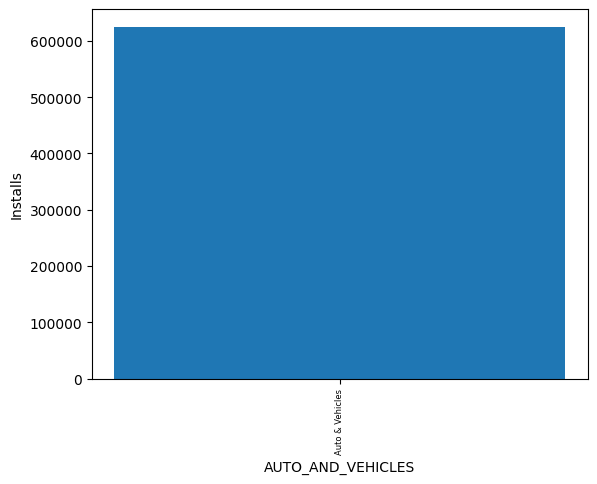

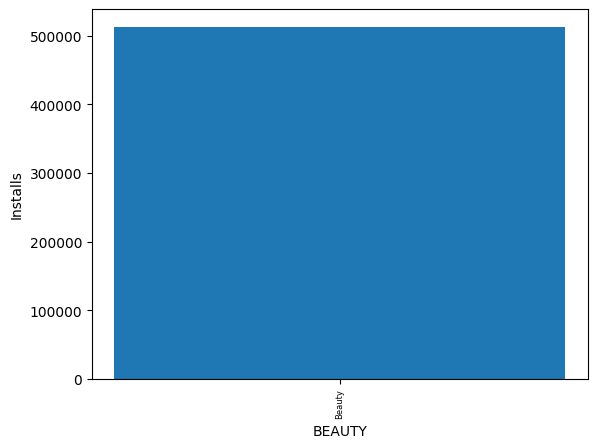

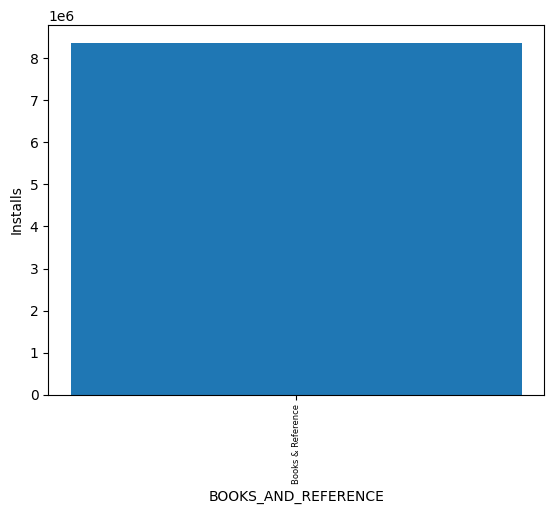

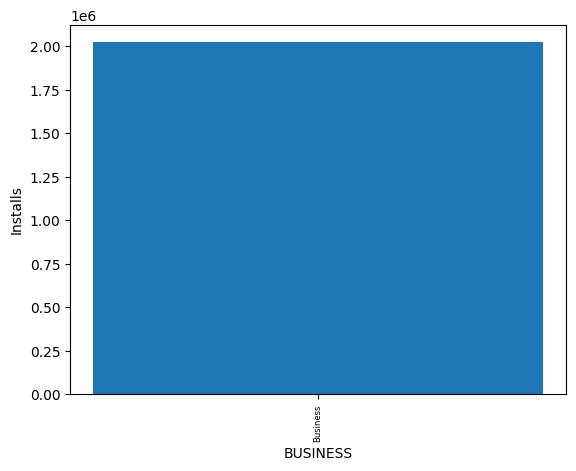

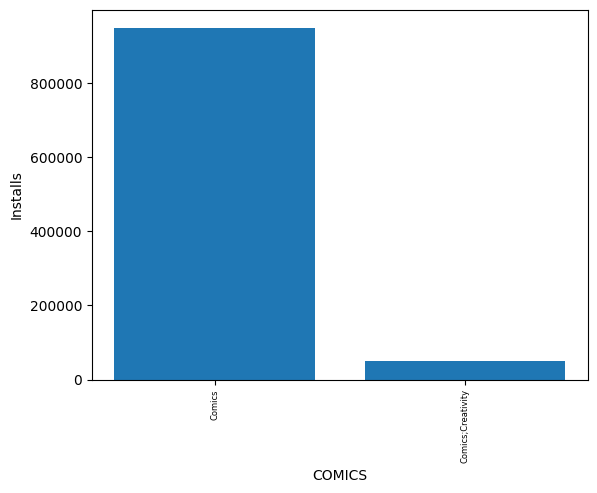

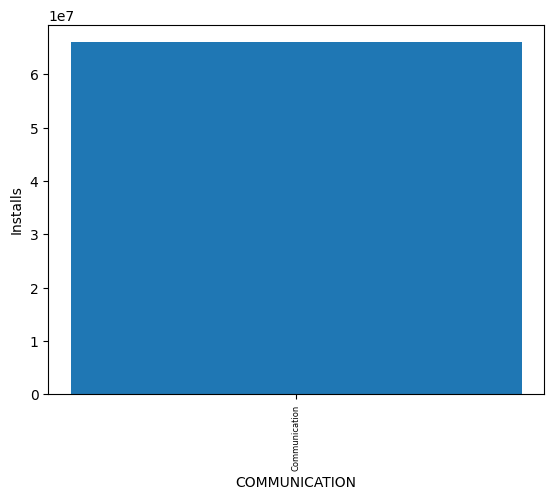

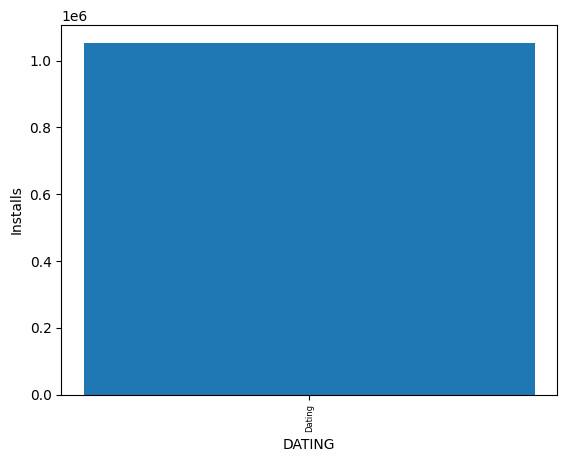

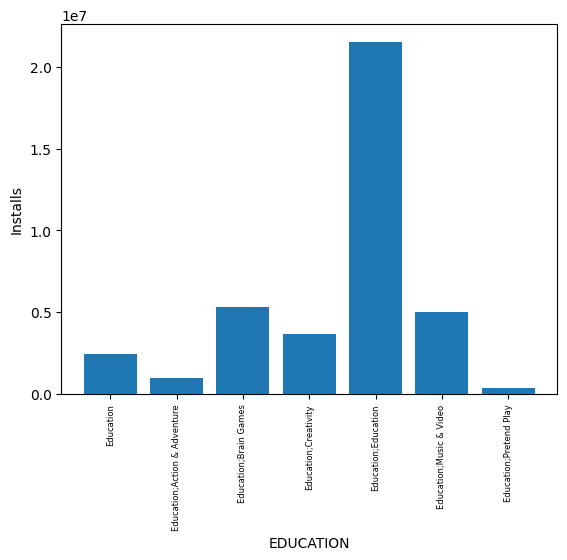

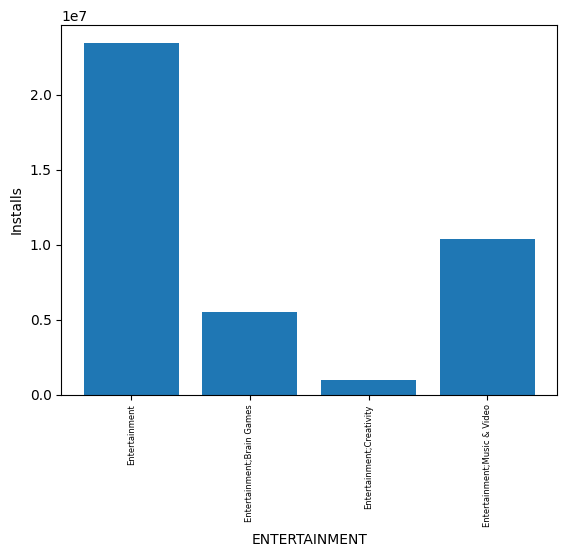

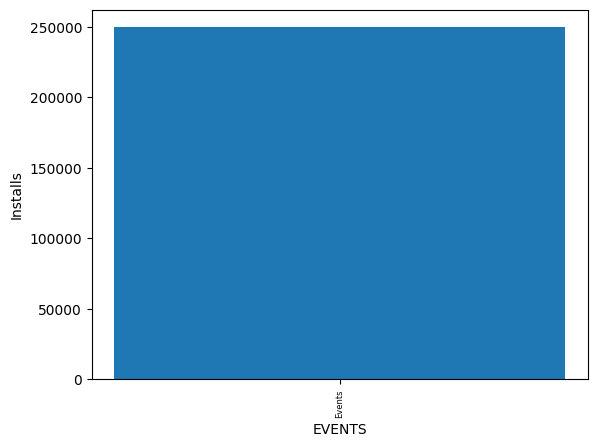

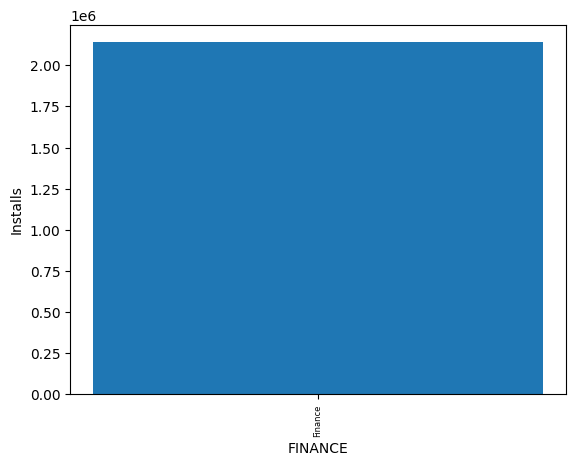

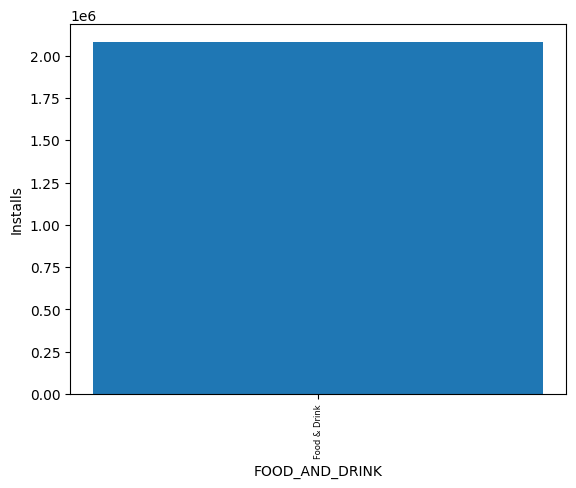

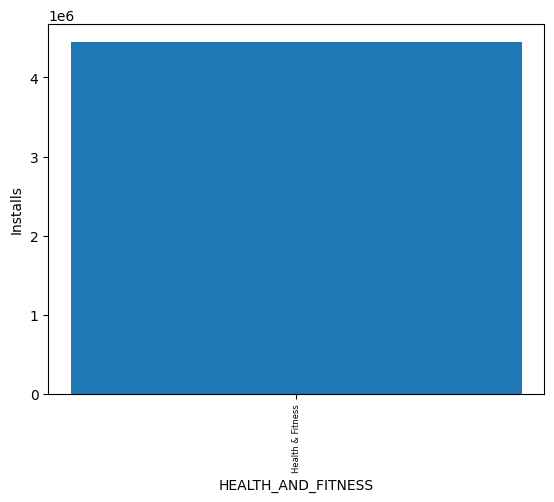

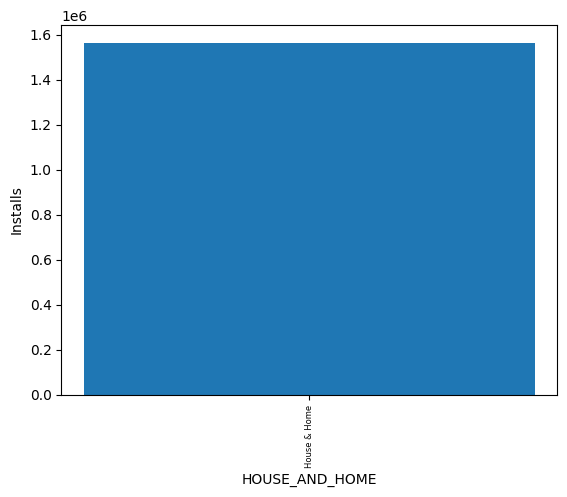

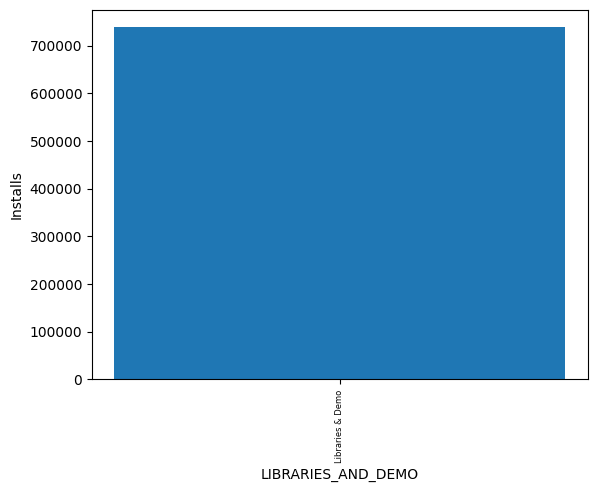

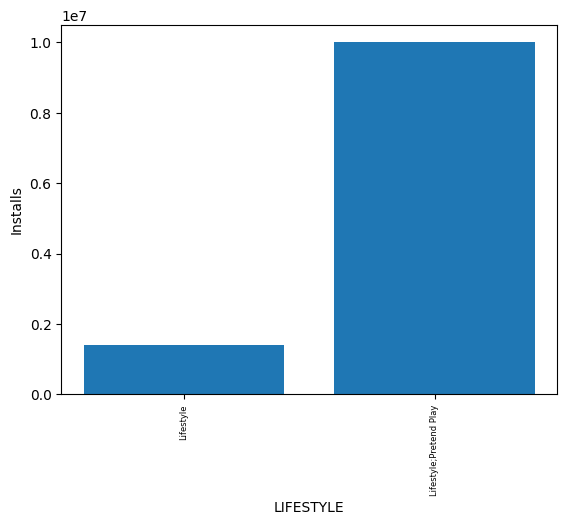

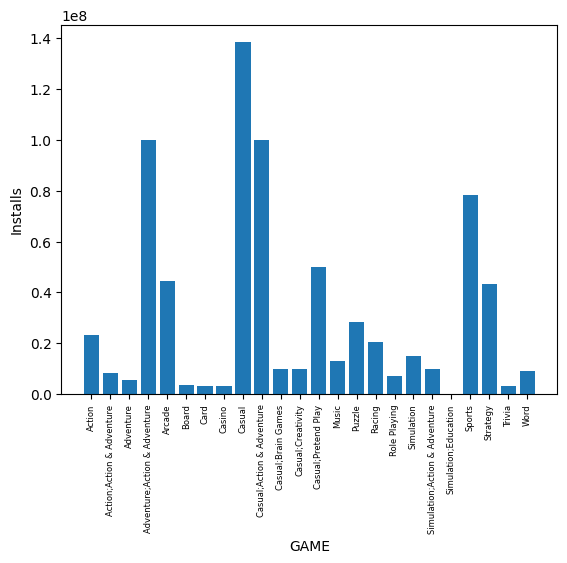

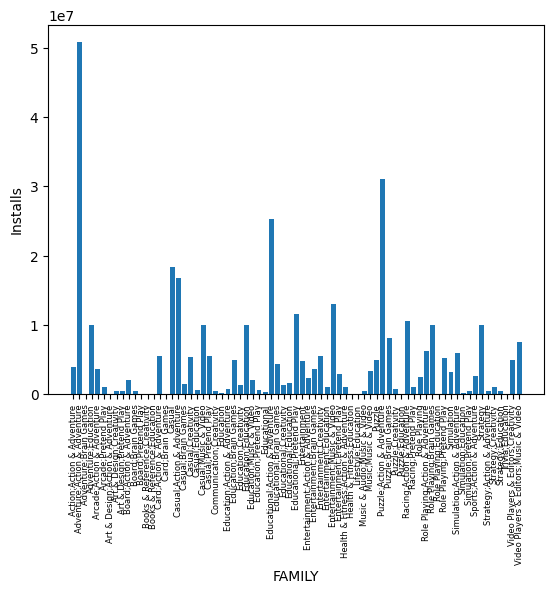

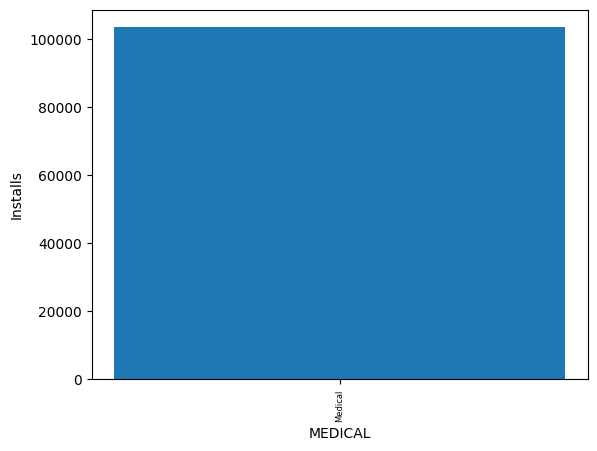

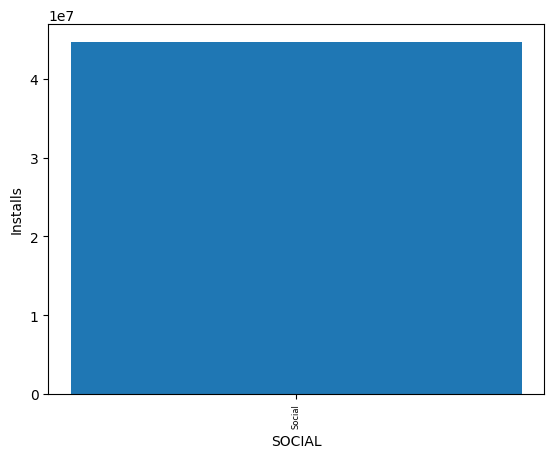

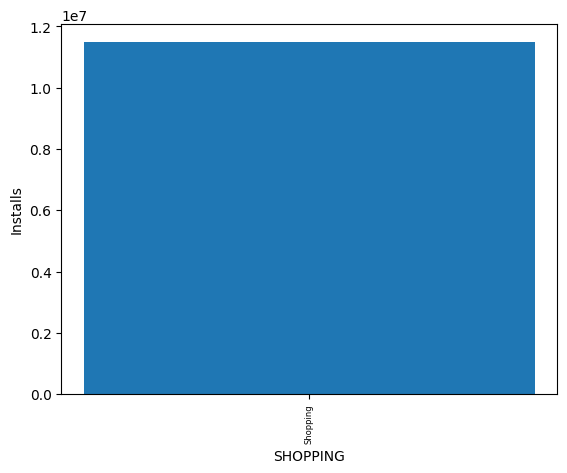

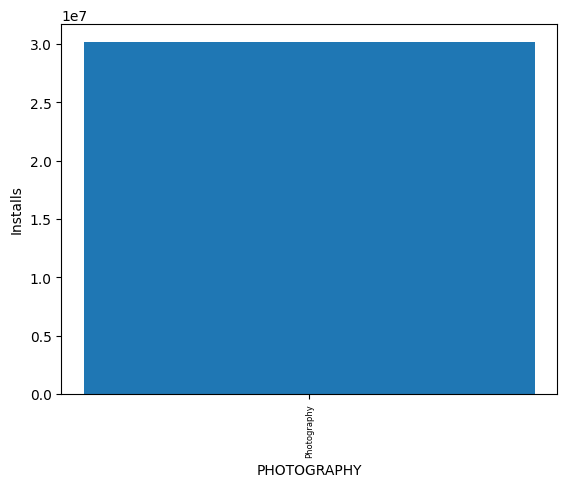

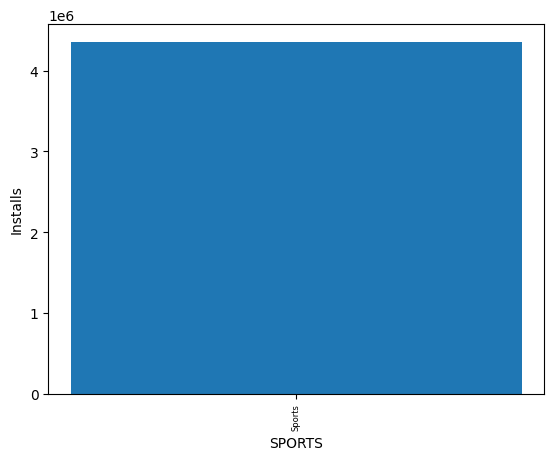

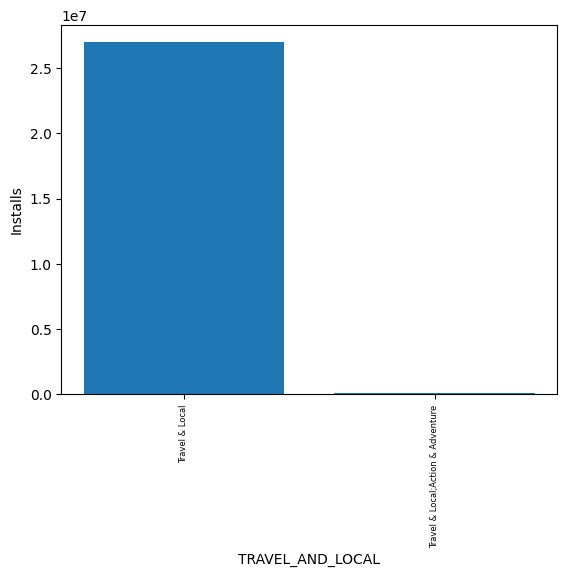

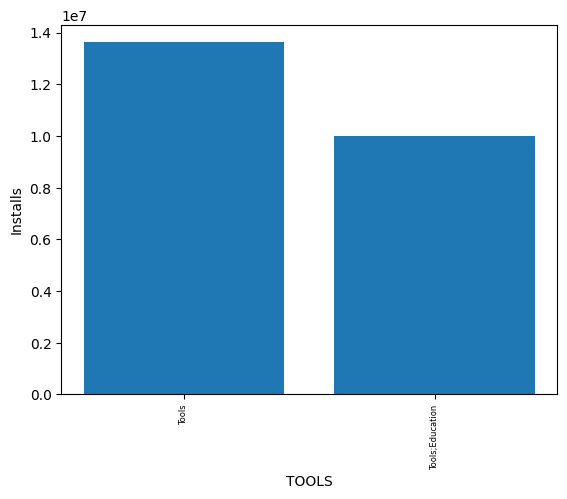

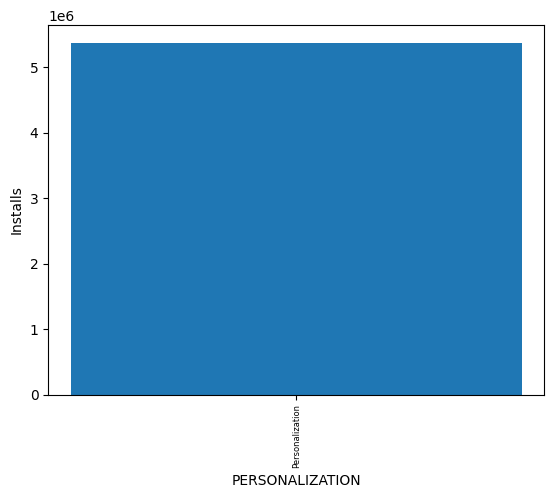

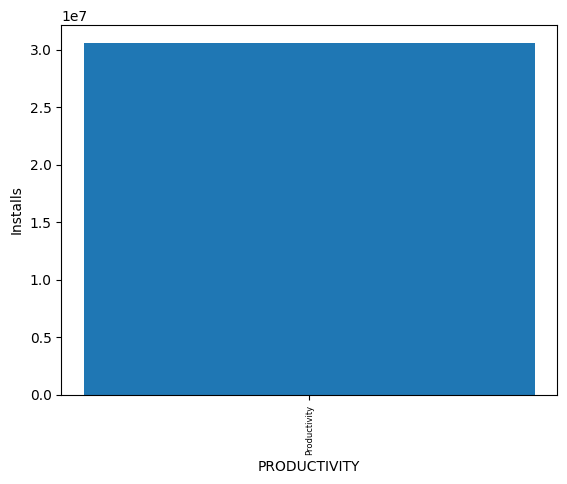

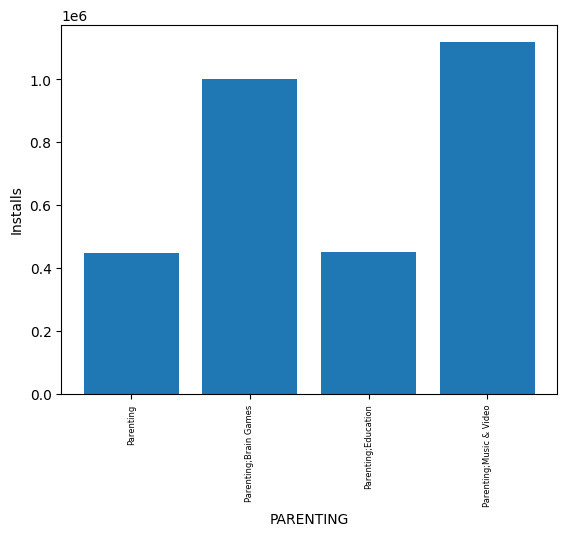

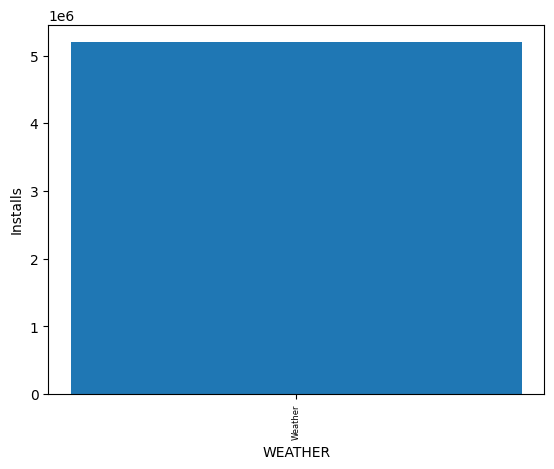

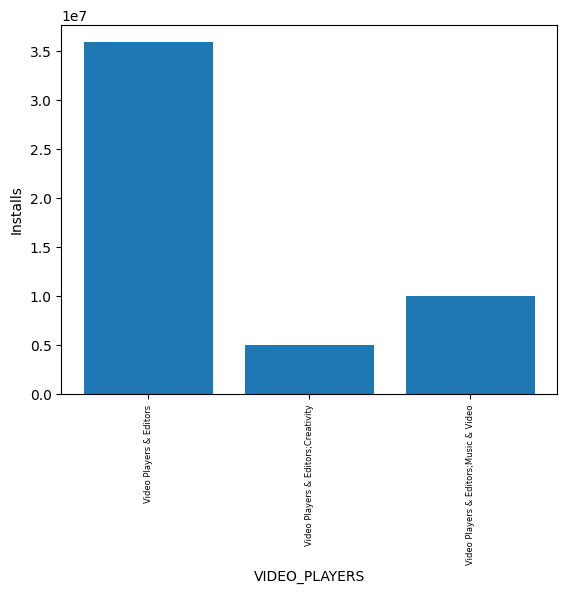

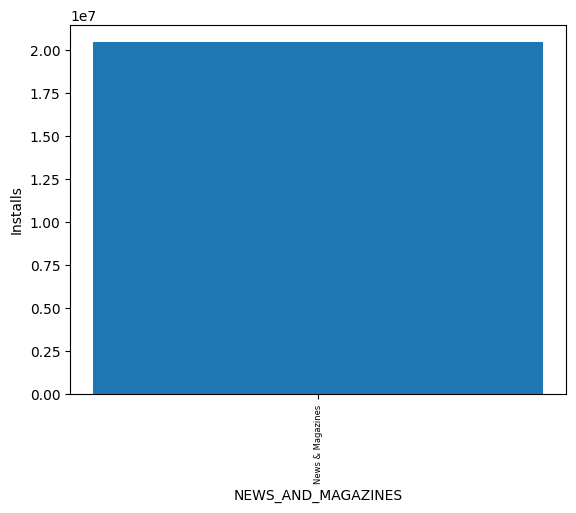

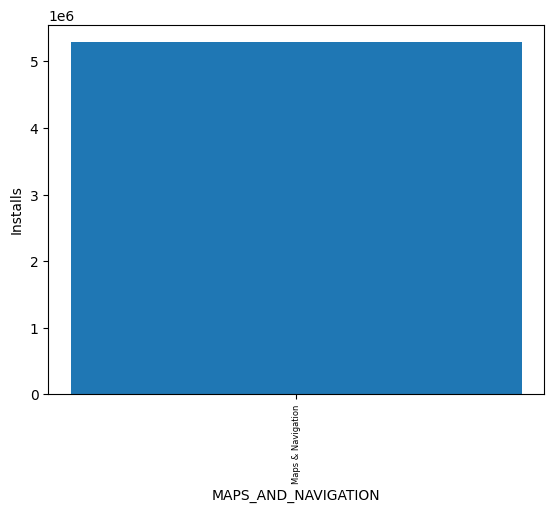

In [105]:
for categories in data['Category'].unique():
  y3 = data[data['Category'] == categories].groupby('Genres')['Installs'].agg('mean')
  plt.bar(y3.index,y3[0:])
  plt.xlabel(categories)
  plt.ylabel('Installs')
  plt.xticks(rotation = 90, size = 6)
  plt.show()  

##### 1. Why did you pick the specific chart?

**I chose these charts to visualise installs of different genres in each category separately.**

##### 2. What is/are the insight(s) found from the chart?

**Each Category and each genre of that category can be easily visualized for the number of downloads, and thus it becomes easier to see which genre under the category the users are interested in.
From Above charts we see that Games and under games casual has highest and sports but in and all on avg action adventure games has the highest number of installs.
Also Under Family, Books & Reference Creativity, Books & Reference Education, Board Pretend Play etc. has least Installs**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these visualizations helps us to know what genre specifically users are interested in thus helps businesses to focus on a narrow area, thus helps cost cutting.**

#### Chart - 5

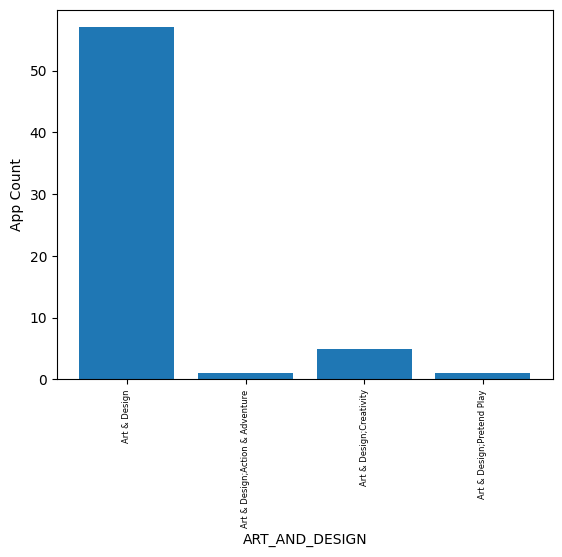

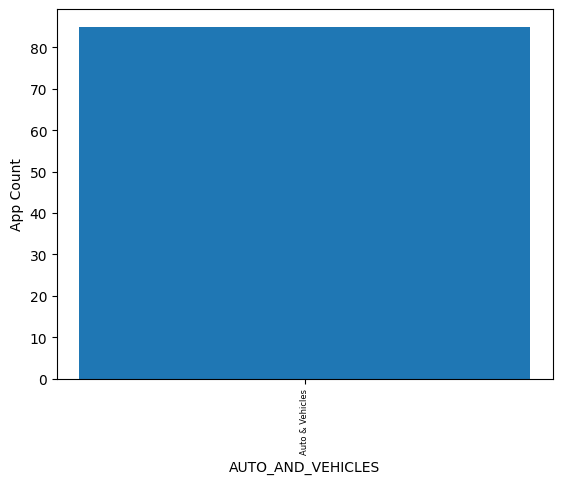

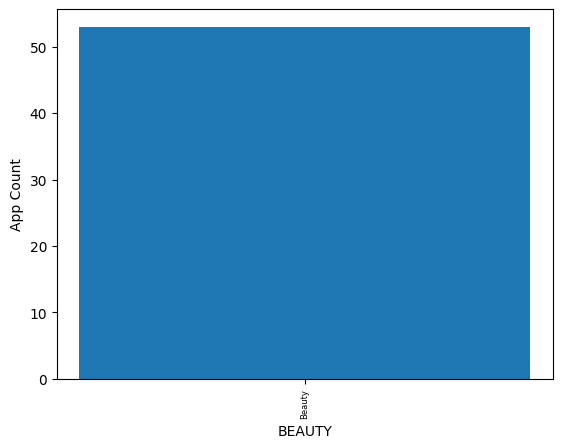

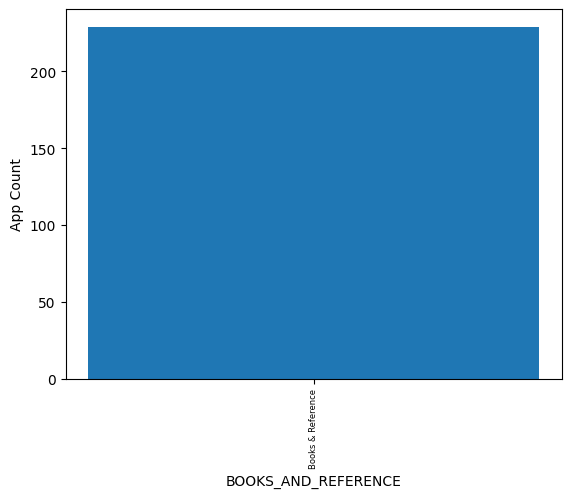

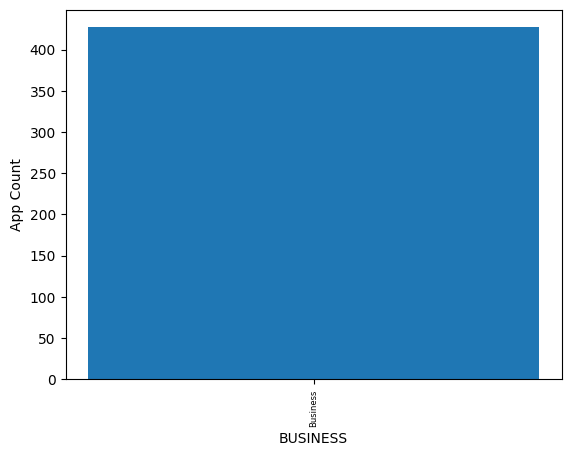

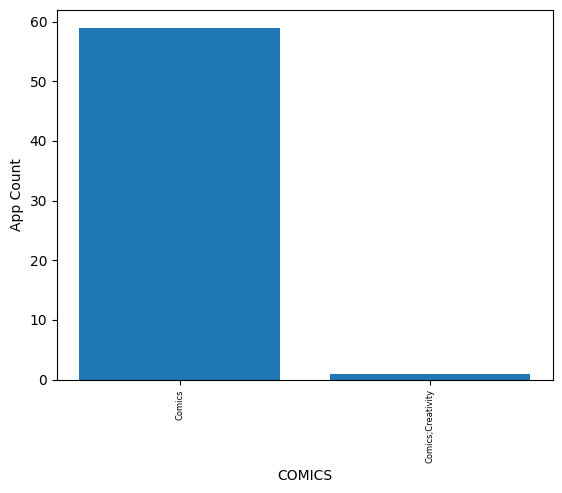

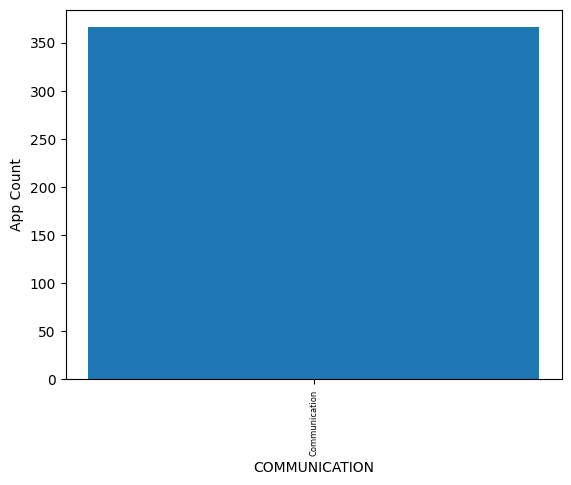

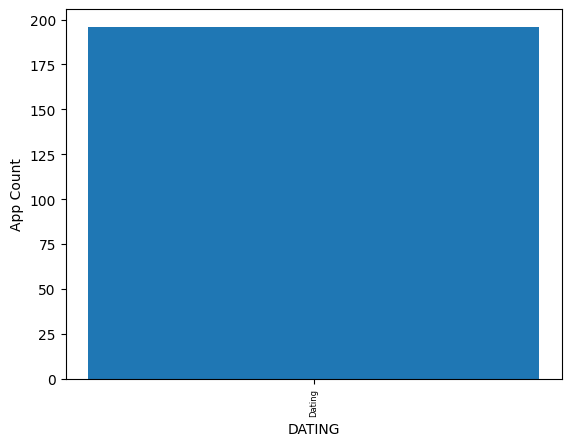

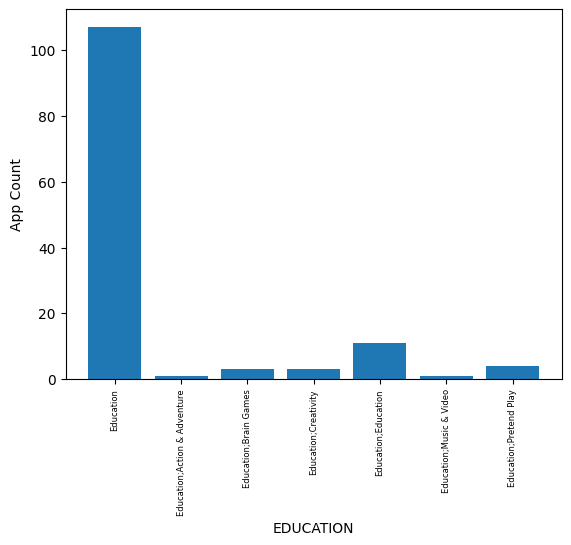

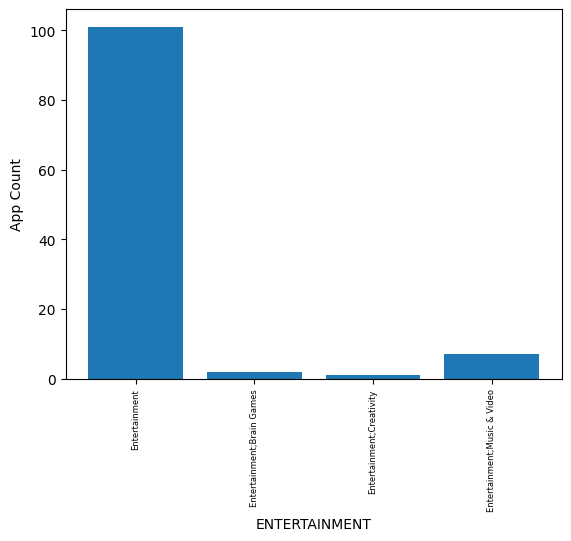

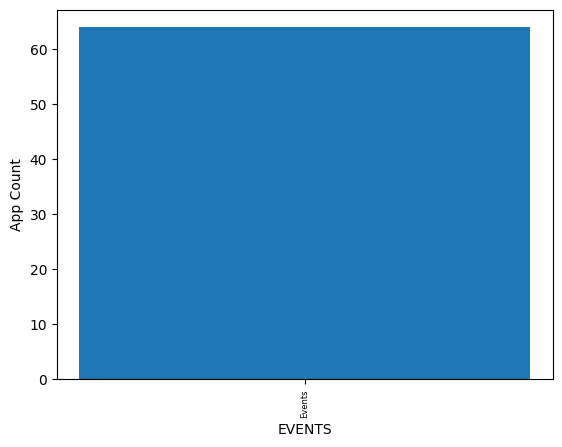

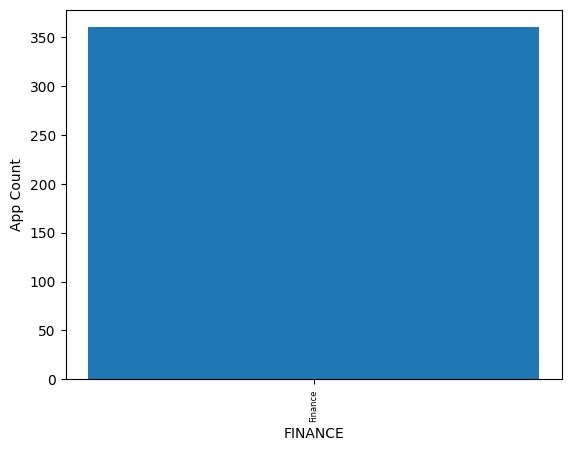

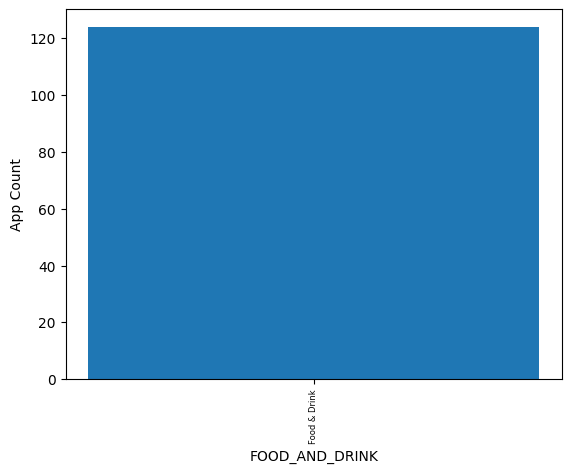

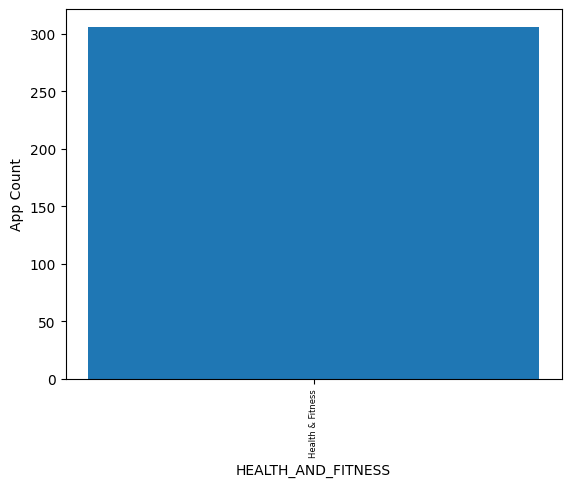

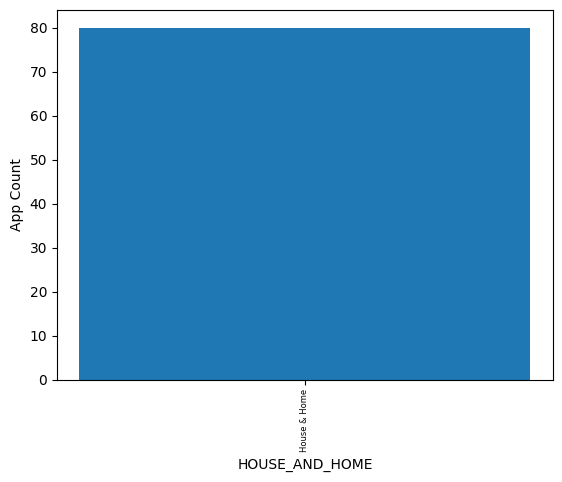

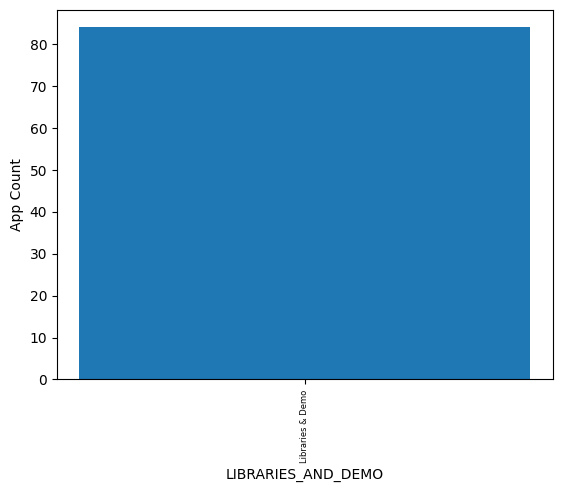

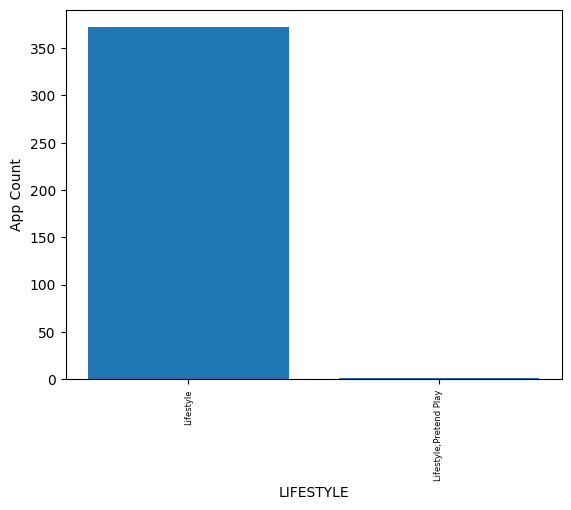

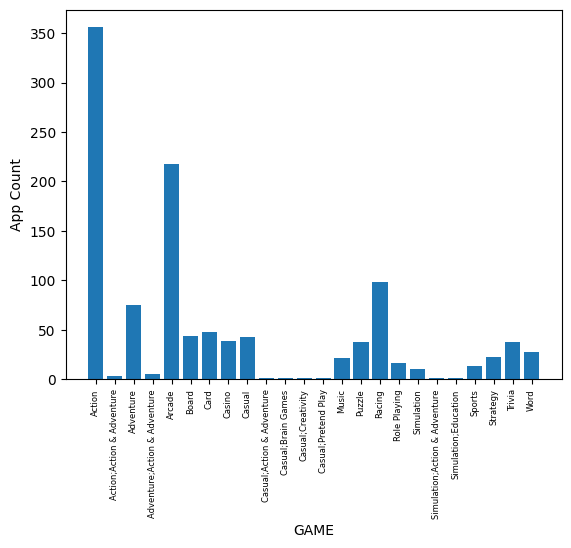

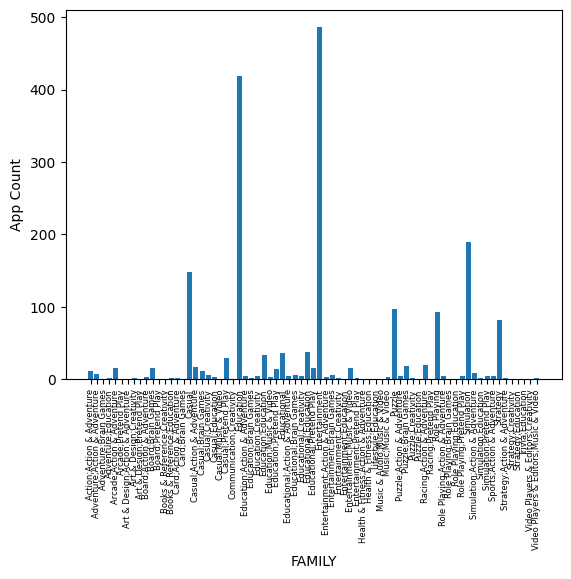

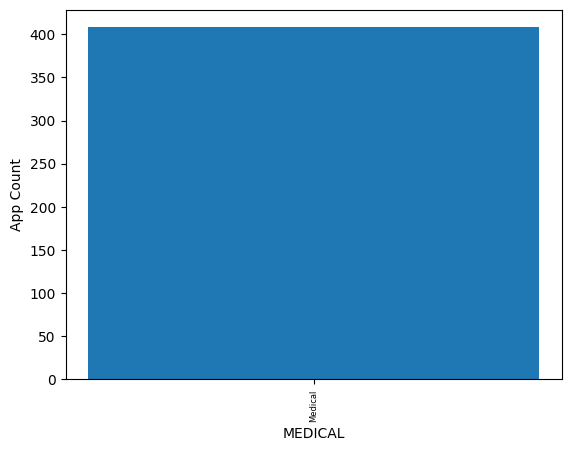

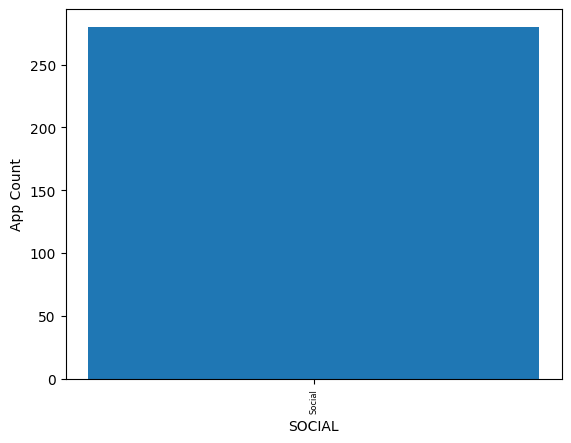

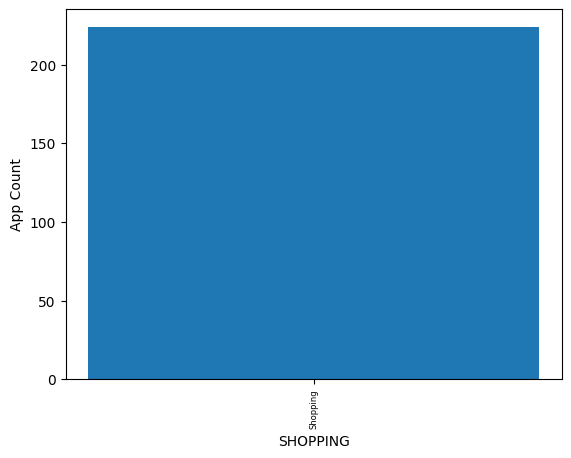

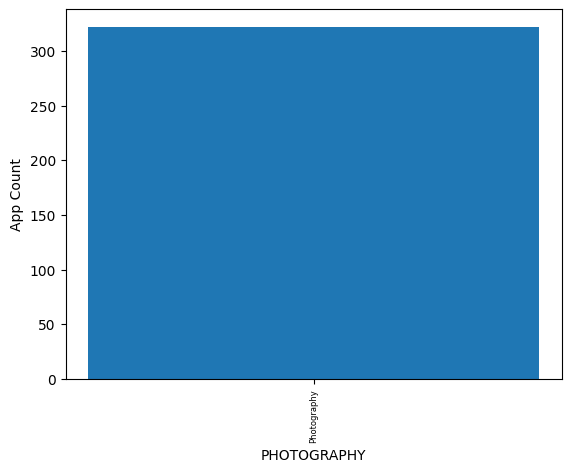

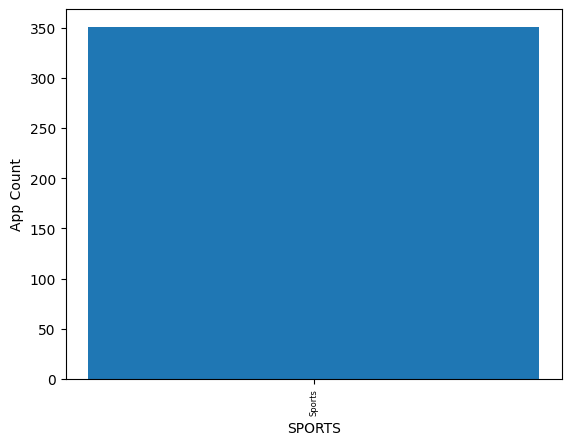

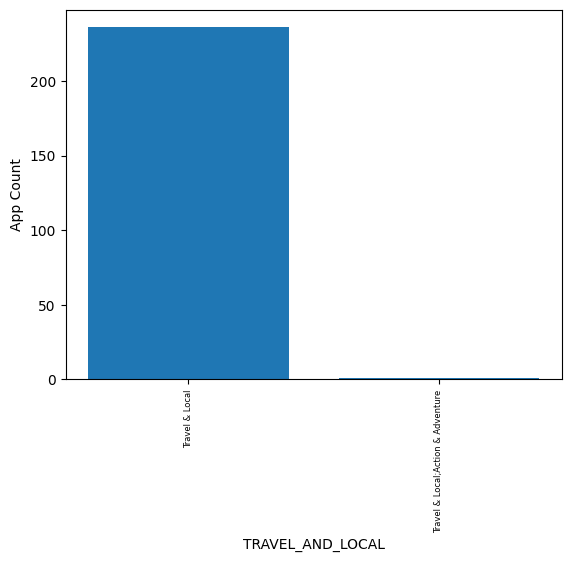

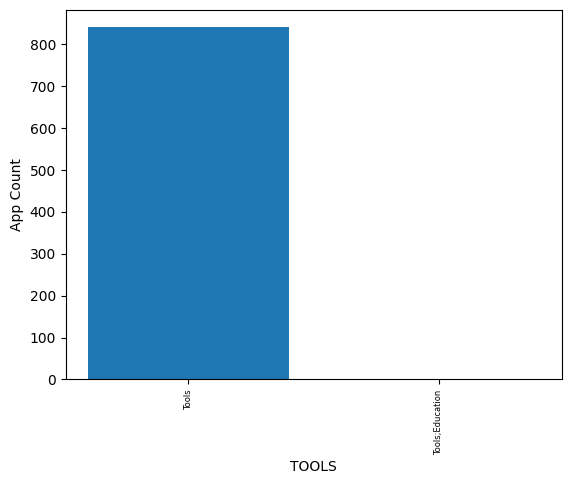

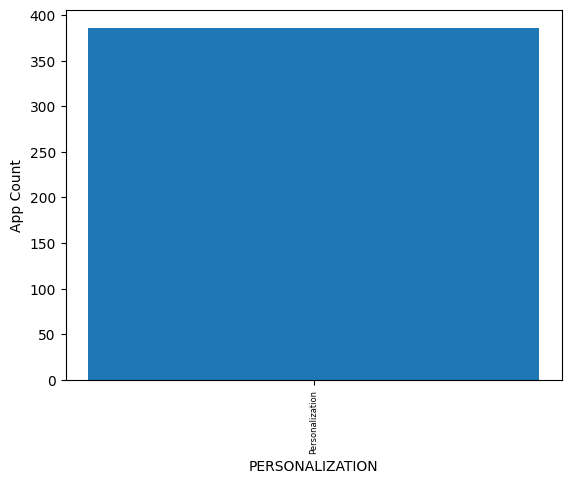

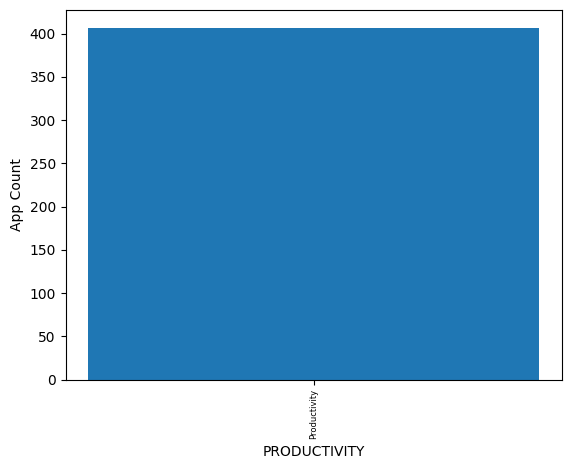

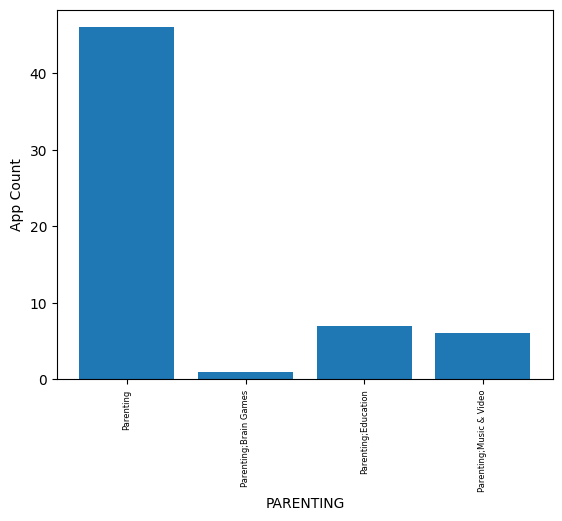

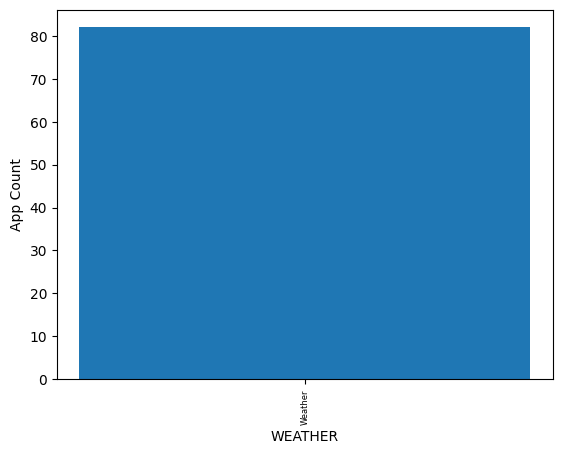

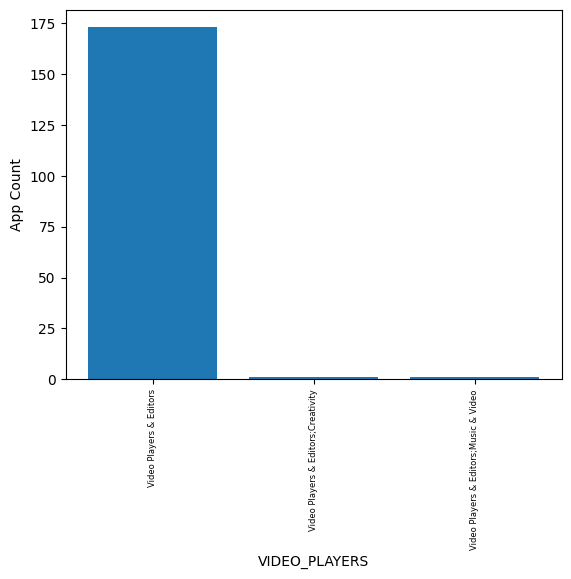

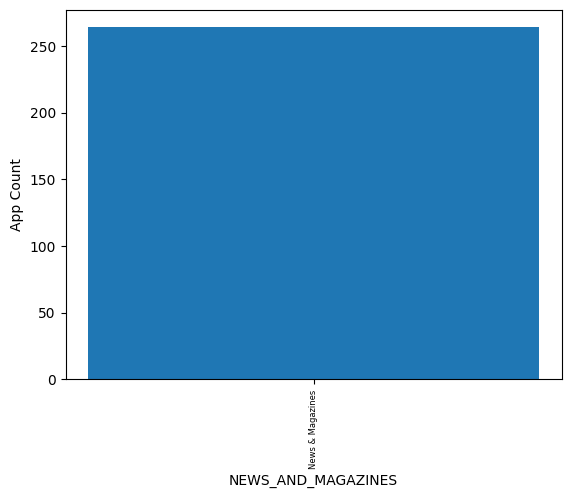

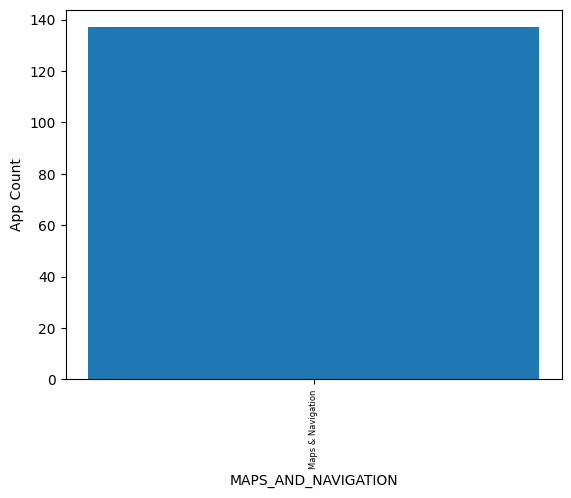

In [60]:
for categories in data['Category'].unique():
  y4 = data[data['Category'] == categories].groupby('Genres')['App'].agg('count')
  plt.bar(y4.index,y4[0:])
  plt.xlabel(categories)
  plt.ylabel('App Count')
  plt.xticks(rotation = 90, size = 6)
  plt.show()

##### 1. Why did you pick the specific chart?

**This Chart I chose to visualize the number of applications on each genre of each category.**

##### 2. What is/are the insight(s) found from the chart?

**From the above charts we can visualize the diversification of genres, eg. so many different applications under tools Category alone of this some will be unique and some will be a competitor app of other, so these charts along with other like with number of installs and studying Reviews of each app helps deep understanding user demands.
There are 250+ apps on just News and magazines and has Installs in billions concluding digital media is taking the grip.
There are multiple Apps for Education with downloads in millions helping students at their home, thus changing the way of study.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The above study will help us know which applications are capable but some bugs are keeping them from success, thus this applications can be improved with joint ventures, where the other company or individual has the knowledge to rectify those bugs or little extra investors where the company needs extra money to solve those bugs thus helping both parties to gain profits with updated applications.
The Reviews will also help us to know the requirements of users which are not fulfilled by the current number of applications.**


#### Chart - 6

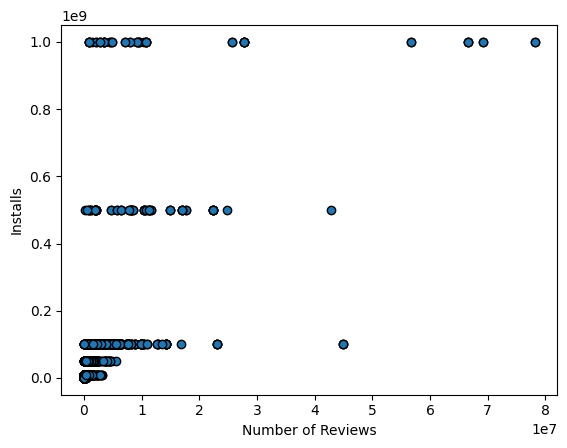

In [109]:
x5 = data['Reviews']
y5 = data['Installs']
plt.xlabel('Number of Reviews')
plt.ylabel('Installs')
plt.scatter(x5, y5, edgecolors='black')
plt.show()

##### 1. Why did you pick the specific chart?

**This chart shows me the users action based on Reviews.**

##### 2. What is/are the insight(s) found from the chart?

**From The chart we can observe that the density of users is more concentrated for reviews in range 0 to 10^7.
Installs Increases with number of reviews but the picture is not much clear here, we can observe better results with correlation heatmap.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**From the above graph we can observe that the Reviews plays a vital role for the number of downloads.
Which is why feedback system or customer Reviews must be taken seriously.**

#### Chart - 7 - Correlation Heatmap

<ipython-input-108-b6236830b421>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

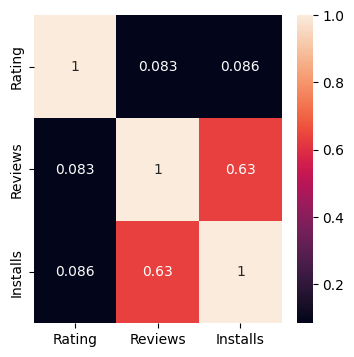

In [108]:
# Correlation Heatmap visualization code
corr = data.corr()
plt.figure(figsize = (4,4))
sns.heatmap(corr, annot = True)


##### 1. Why did you pick the specific chart?

**The above chart shows correlation of Reviews, Installs and Rating with each other. This Chart helps to identify if the relations between two variables is strong correlation or weak correlation.**

##### 2. What is/are the insight(s) found from the chart?





**From Above we observe that Reviews impacts the Installs 63% of times, that is Reviews and Installs has positive correlation with each other.**

#### Chart - 8

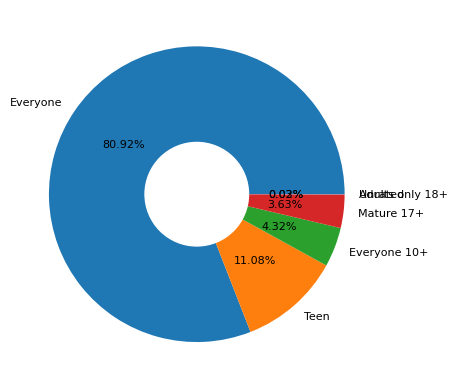

In [110]:
labels1 = data['Content Rating'].unique()
plt.pie(data['Content Rating'].value_counts(), labels = labels1, autopct = '%1.2f%%', textprops={'fontsize': 8})
circle = plt.Circle((0,0),0.35,color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

##### 1. Why did you pick the specific chart?

**The above chart is describing percent of applications for set of defined age groups.**

##### 2. What is/are the insight(s) found from the chart?


**From Above Chart it is Clear that most of the applications are for everyone i.e. 80.92%. whereas only for adult is the least with 0.02%.**

#### Chart - 9 - Pair Plot 

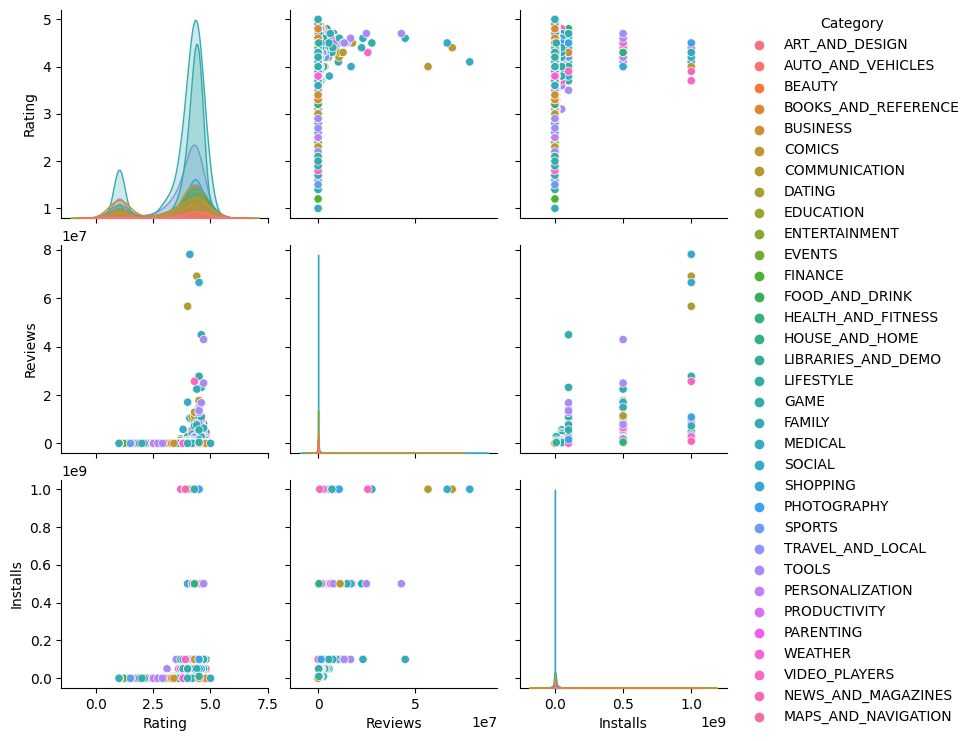

In [111]:
# Pair Plot visualization code
sns.pairplot(data, hue = 'Category')

##### 1. Why did you pick the specific chart?

**Pairplot helps identify the correlation between each pair in the given dataset**

##### 2. What is/are the insight(s) found from the chart?

**It is seen that ratings and Reviews are not having much of relations, If the rating is good and reviews are good then Installs are also high.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

From My study of Given dataset, Games and Entertainment are the most needed stuff on mobile, so mobile phones with good gaming capacity, better multimedia support will have more demand, because such phones can fulfil the needs of users today.
The Aim for the business must be a good Operating system and good hardware phones must be put in the market, also new and better themed action game creation can also benefit a lot.

# **Conclusion**

1. Mobile Games are now the needs of the generation.
2. Users want entertainment every now and then.
3. Users want their work load reduced with the help of tools through mobile applications.
4. Users now look everything in their hand and not having to go here and there physically to get there work done.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***